In [1]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random

In [2]:
def calprob(point, mu, sigma):
    pro = multivariate_normal(mu,sigma).pdf(point)
    return pro

In [34]:
def drawpro(data):
    plt.figure()
    plt.imshow(data,cmap='jet',extent=(-2, 2, -2, 2))
    #plt.colorbar()
    plt.xlabel('w0') 
    plt.ylabel('w1')
    plt.show()

In [4]:
def calprior(mu, sigma):
    w0 = np.arange(-1.0, 1.0, 0.01)
    w1 = np.arange(-1.0, 1.0, 0.01)
    x, y = np.meshgrid(w0, w1)
    pro = np.zeros((len(w0),len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            pro[i,j] = multivariate_normal(mu, sigma).pdf([x[i,j],y[i,j]])
    return pro

In [5]:
def drawline(w0,w1):
    x = np.arange(-1.0, 1.0, 0.01)
    fig = plt.figure()
    ax = plt.gca()
    for i in range(len(w0)):
        y = w0[i]*x + w1[i]
        plt.plot(x,y)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

In [6]:
def resampling(pro,num):
    length = len(pro)
    weights = np.reshape(pro,length*length)
    weights = weights/sum(weights)
    i, j = 0, 0
    N = len(weights) - 1
    # make N subdivisions, and choose positions with a consistent random offset
    positions = (random.random() + np.arange(N)) / N

    indexes = np.zeros(N, 'i')
    cumulative_sum = np.cumsum(weights)
    while i < N:
        if positions[i] < cumulative_sum[j]:
            indexes[i] = j
            i += 1
        else:
            j += 1
    w0 = []
    w1 = []
    for a in range(num):
        ran = random.randint(0, N-1)
        index = indexes[ran] + 1
        x = int(index/length) 
        w1.append(x * 0.01 - 1)
        y = index - int(index/length)*length 
        w0.append(y * 0.01 - 1)
    return w0,w1

In [47]:
def calposterior(mu,sigma,sig_sqr,xlist,tlist,Z,n):
    w0 = np.arange(-1.0, 1.0, 0.01)
    w1 = np.arange(-1.0, 1.0, 0.01)
    # n = len(w0) 
    x, y = np.meshgrid(w0, w1)
    
    if n == 1:
        index = 0
    else:
        index = random.randint(0, n-1)
    
    pro = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            pro[i,j] = multivariate_normal(mu, sigma).pdf([x[i,j],y[i,j]]) * norm(xlist[index]*x[i,j]+y[i,j], sig_sqr).pdf(tlist[index])
    if Z == 1:
        pro = pro
    else:
        Z = Z - 1
        for z in range(Z):
            index = random.randint(0, n-1)
            for i in range(len(w0)):
                for j in range(len(w1)):
                    pro[i,j] = pro[i,j] * norm(xlist[index]*x[i,j]+y[i,j], sig_sqr).pdf(tlist[index])
    return pro

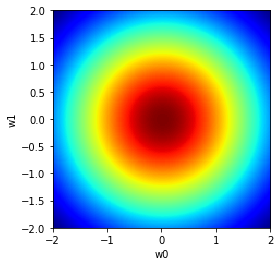

In [35]:
n = 200

xList = np.arange(-1, 1, 0.01)
tList = []
w = np.array([[0.5, -1.5]])
noise = random.normal(0,0.2,n)
for i in range(n):
    t = w[0,0]*xList[i] + w[0,1] + noise[i]
    tList.append(t)

#prior
mu = [0,0]
sig_sqr = 0.2
sigma = [[0.5,0],[0,0.5]]

#visialize the prior distribution
pro_prior = calprior(mu, sigma)
drawpro(pro_prior)

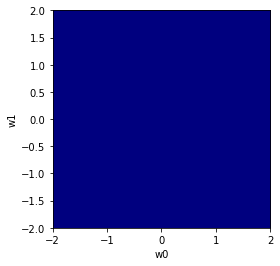

In [48]:
#update 10 times
num = 1
pro_new = calposterior(mu,sigma,sig_sqr,xList,tList,1,n)
# w0,w1 = resampling(pro_new,num)
drawpro(pro_new)
# drawline(w0,w1)